### The Spark Foundation - GRIP Jun2021

### Task-1 : Predict the percentage of a student based on the no. of study hours.

In [1]:
# Importing libraries required in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the data
data = pd.read_csv('data.csv')
print("Data imported successfully")
data.head(5)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Plotting data points on 2-D graph and see if we can manually find any relationship between the data.

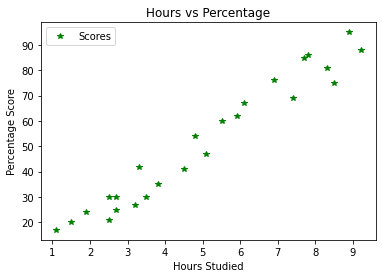

In [3]:
# Plotting the distribution of scores
data.plot(x = 'Hours', y = 'Scores', style = '*', color = 'green')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

#### dividing the data into "attributes" (inputs) and "labels" (outputs)

In [4]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values

### splitting the data into training data and testing data

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
# 80% for training and 20% for testing

### Training the Algorithm

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print("Training complete.")

Training complete.


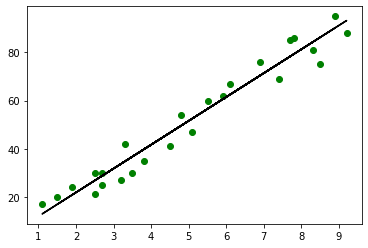

In [7]:
# Plotting the regression line
line = model.coef_*X + model.intercept_
# Plotting for the test data
plt.scatter(X, Y, color = "green")
plt.plot(X, line, color = 'black');
plt.show()

### Making Predictions

In [8]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Predicting score for new data

In [10]:
# You can also test with your own data
hours = 9.25
new_pred = model.predict([[hours]])
print(*new_pred)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(new_pred[0]))

93.69173248737539
No of Hours = 9.25
Predicted Score = 93.69173248737539


### Evaluating the model

In [11]:
from sklearn import metrics
print('Mean Absolute Error:',
metrics.mean_absolute_error(y_test, y_pred))

from sklearn.metrics import r2_score
print("R-squared value :", r2_score(y_test, y_pred) * 100)

Mean Absolute Error: 4.183859899002982
R-squared value : 94.54906892105353
